
<h1 align=center><font size = 5>Statistical Inference with Python</font></h1>

In [1]:
# Importando librerias
import numpy as np
import pandas as pd

In [2]:
datadf = pd.read_csv("data.csv",sep = ";")
datadf.head()

,id,Gender,Python_user,R_user,Age,Publications,Tasks,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Year
0,1,female,yes,yes,38.0,33,Postdoctoral_research,5,5,5,3,3,2,5,4,5,4,2004
1,2,male,no,yes,36.0,31,Postdoctoral_research,3,4,4,4,4,3,5,4,4,2,2002
2,3,male,yes,no,30.0,19,PhD_Student,5,5,5,4,5,4,5,4,5,5,2016
3,4,female,yes,no,42.0,29,Phd_Supervisor,4,4,4,3,3,4,4,2,3,4,2007
4,5,female,yes,no,37.0,31,PhD_Student,4,3,5,2,4,4,5,3,5,4,2001


In [3]:
# Muestra los tipos de datos
datadf.dtypes

id                int64
Gender           object
Python_user      object
R_user           object
Age             float64
Publications      int64
Tasks            object
Q1                int64
Q2                int64
Q3                int64
Q4                int64
Q5                int64
Q6                int64
Q7                int64
Q8                int64
Q9                int64
Q10               int64
Year              int64
dtype: object

In [4]:
datadf['Age'].mean()

37.05555555555556

In [5]:
datadf['Age'][60:69]

60    39.0
61    48.0
62    32.0
63    39.0
64    34.0
65     NaN
66    46.0
67    38.0
68    41.0
Name: Age, dtype: float64

# 1.- Normality Tests

## Numerically

In [6]:
# Muestra los edades agrupadas
#datadf['Age'].value_counts()

In [7]:
print(np.isnan(datadf['Age'][64]))
print(np.isnan(datadf['Age'][65]))
print(np.isnan(datadf['Age'][66]))

# Obtenemos la media
mean_age = datadf['Age'].mean()

# Reemplaza los datos faltantes con la media.
# Se muestran 2 formas
#datadf['Age'][np.isnan(datadf['Age'])] = mean_age
datadf['Age'] = datadf['Age'].fillna(mean_age)

False
True
False


### Shapiro Test 

Hipotesis:

- $H_0$: La variable tiene distribución normal (hipotesis nula)
- $H_1$: La variable no tiene distribución normal (hipotesis alterna)

In [8]:
### Shapiro-Wilk normality test for Age and Publications variables

# Import packages
import scipy
from scipy import stats

In [9]:
# Shapiro-Wilk test for Age variables
stats.shapiro(datadf['Age'])

(0.9920958876609802, 0.3522576689720154)

Como p.valor = 0.3523 > 0.05, se tiene sufiiente evidencia estadistica para aceptar
la hipotesis nula, por lo tanto la variable Age cumple el supuesto de normalidad

In [10]:
# Shapiro-Wilk test for Publications variables
stats.shapiro(datadf['Publications'])

(0.9592043161392212, 1.6238263924606144e-05)

### Kolmogorov-Smirnov

Hipotesis:

- $H_0$: La variable tiene distribución normal (hipotesis nula)
- $H_1$: La variable no tiene distribución normal (hipotesis alterna)

In [11]:
# SALE CUALQUIER VALOE

'''
# Perform test KS test against a normal distribution with
# mean = 5 and sd = 3
stats.kstest(datadf['Age'], 'norm', args=(5, 3))
'''
None

In [38]:
import rpy2.robjects as ro

# Ver version de R
print(ro.r('R.version.string'))

[1] "R version 3.5.1 (2018-07-02)"



In [43]:
### Kolmogorov-Smirnov normality test for Age and Publications variables
'''
# Import packages
import rpy2.robjects as ro

ro.r('data_df <- read.csv("data.csv",sep=";")')

# Reading the R’s package zoo, needed to apply na.aggregatefunction
ro.r('install.packages("zoo")')
ro.r('library(zoo)')

# Kolmogorov-Smirnov Normal Distribution test for Age and Publications variables
print(ro.r('ks.test(na.aggregate(data_df$Age),rnorm(200, mean(na.aggregate(data_df$Age)), sd(na.aggregate(data_df$Age))))'))
print(ro.r('ks.test(data_df$Publications, rnorm(200, mean(data_df$Publications)))'))
'''

R[write to console]: Error in contrib.url(repos, type) : 
  trying to use CRAN without setting a mirror
Calls: <Anonymous> ... <Anonymous> -> install.packages -> grep -> contrib.url



RRuntimeError: Error in contrib.url(repos, type) : 
  trying to use CRAN without setting a mirror
Calls: <Anonymous> ... <Anonymous> -> install.packages -> grep -> contrib.url


# 2.- Graphically

To synthesize (with Kolmogorov-Smirnov test)

|Variable    |p.value        |H0          |Normality |Tests
|------------|---------------|------------|----------|--------------
|Age         |0.7112 > 0.05  |Not rejected|Normal    |Parametric
|Publications|2.22e-16 < 0.05|Rejected    |Non-normal|Non-parametric


### QQ-plots


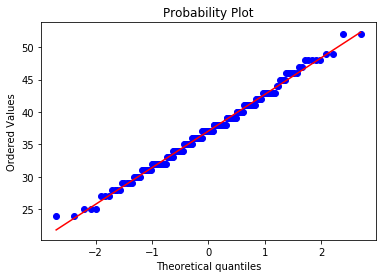

In [19]:
# Needed package
import pylab
import scipy.stats as stats
#a) # Test normality with normal Q-Q Plot for Age variable
stats.probplot(datadf['Age'], dist="norm", plot=pylab)
pylab.show()


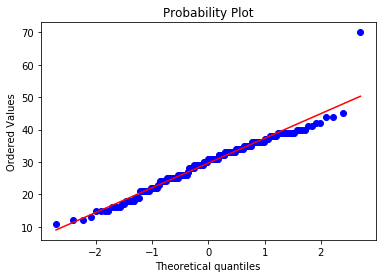

In [20]:
#b) # Test normality with normal Q-Q Plot for Publications variable
stats.probplot(datadf['Publications'], dist="norm", plot=pylab)
pylab.show()

# 3.- Parametric Tests

## Student’s t-Test

The Student’s t-test is used when the objective is to analyze the distribution of a numerical variable by a categorical variable with two-factor levels. For example, the variation of the Age with the Gender (male vs. female) is one of these cases.

Hipotesis:

- $H_0$: No hay la diferencia entre las dos medias de la población (hipotesis nula)
- $H_1$: Hay diferencia entre las dos medias de la población (hipotesis alterna)

Hipotesis:

- $H_0$: $mu_0 = mu_1$ (hipotesis nula)
- $H_1$: $mu_0 \neq mu_1$ (hipotesis alterna)

In [21]:
### Student’s t-test
# Student’s t-test with replacing the missing values by the mean of the variable

#datadf['Age'][np.isnan(datadf['Age'])] = mean_age
datadf['Age'] = datadf['Age'].fillna(mean_age)

stats.ttest_ind(datadf['Age'][datadf['Gender'] == "male"],
                datadf['Age'][datadf['Gender'] == "female"])

Ttest_indResult(statistic=-0.2833085288319908, pvalue=0.7772363334032341)

Como p.valor = 0.777 > 0.05, se tiene sufiiente evidencia estadistica para aceptar
la hipotesis nula, por lo tanto se puede asumir que el promedio de la edad de hombres y mujeres que realizan investigación es la misma

## ANOVA

The one-way analysis of variance (ANOVA) is used to determine whether there are any significant differences between the means of three or more independent (unrelated) groups.
To apply an ANOVA test, there are three needed primary assumptions:

- The dependent variable is normally distributed in each group that is being compared in the one-way ANOVA.
- There is variances homogeneity. The population variances in each group are equal. Levene’s Test is used for testing the Homogeneity of Variances.
- Independence of observations. This is mostly a study design issue and, as such, it will be needed to determine if they are independent.

Hipotesis:

- $H_0$: $mu_1 = mu_2 = mu_3 = ...... = mu_k$ (hipotesis nula)
- $H_1$: Al menos hay una media que no es igual (hipotesis alterna)

### Levene’s test

Verify the homogeneity of variances

Hipotesis:

- $H_0$: $\sigma_1^2 = \sigma_2^2 = \sigma_3^3 = ...... = \sigma_k^2$ (hipotesis nula)
- $H_1$: $\sigma_i^2 \neq \sigma_j^2$ para al menos un par de (i,j) (hipotesis alterna)

In [22]:
### Levene’s test
# Levene’s test of the Age depending of the Tasks. Test with NA’s substituted by the mean
stats.levene(datadf['Age'][datadf['Tasks']=="PhD_Student"],
             datadf['Age'][datadf['Tasks']=="Phd_Supervisor"],
             datadf['Age'][datadf['Tasks']=="Postdoctoral_research"], center = 'median')

LeveneResult(statistic=4.718839417255889, pvalue=0.009958868591183941)

Como p.valor = 0.00996 < 0.05, no se tiene suficiente evidencia estadistica para 
aceptar la hipotesis nula, por lo tanto se rechaza. Se asume que no hay 
homogeneidad de varianza (heterocedasticidad de varianza)

### ANOVA test with Welch’s correction

In [42]:
### One-Way ANOVA with R for Welch’s correction
'''
# Import packages
import rpy2.robjects as ro

# Reading the data with R
ro.r('data_df <- read.csv("data.csv",sep=";")')

# Get NA values equal to Age’s mean with function na.aggregate and zoo package
ro.r('library(zoo)')
ro.r('library(stats)')

# ANOVA with Welch correction (var.equal = FALSE) 
print(ro.r('oneway.test(na.aggregate(data_df$Age)~Tasks, data = data_df, na.action=na.omit, var.equal=FALSE)'))

'''

R[write to console]: Error: package or namespace load failed for ‘zoo’:
 object 'autoplot' not found whilst loading namespace 'zoo'

R[write to console]: Además: 
R[write to console]: Warning message:

R[write to console]: package ‘zoo’ was built under R version 3.6.1 



RRuntimeError: Error: package or namespace load failed for ‘zoo’:
 object 'autoplot' not found whilst loading namespace 'zoo'


Como (p-value < 2.2e-16) < 0.05, Se tiene suficiente evidencia estadistica para rechazar
la hipotesis nula, por lo tanto se puede asumir que las varianzas de hombres y mujeres que 
realizan investigación NO es la misma (heterocedasticidad de varianza)

However, as there are three-factor levels, post-hoc tests should be used. In a case of the variances homogeneity being violated, the Games-Howell test is more appropriate then Tukey test

In [24]:
# EN PYTHON NO ESTA IMPLEMENTADO LA PRUEBA DE GAMES-HOWELL 
# PARA VARIABLES CATEGORICAS Y NUMERICAS

# 
# stats.ttest_ind(datadf['Age'].astype("int"), datadf['Tasks'], equal_var = False)
# stats.ttest_ind(datadf['Age'], datadf['Tasks'], equal_var = False)


### Games-Howell test

The Games-Howell test is used when variances are unequal and also takes into account unequal group sizes. Severely unequal variances can lead to increased Type I error, and, with smaller sample sizes, the more moderate differences in-group variance can result in increases in Type I error. The Games-Howell test, which is designed for unequal variances, is based on Welch’s correction

In [26]:
# Se instala el paquete de R "userfriendlyscience"
# que sera invocado desde el terminal

# https://github.com/conda-forge/r-userfriendlyscience-feedstock
# conda config --add channels conda-forge
# conda install r-userfriendlyscience

# conda install r-Rcpp

In [27]:
### Games-Howell test for multiple comparisons (asking R)
# See https://sites.google.com/site/aslugsguidetopython/data-analysis/pandas/calling-r-from-python

'''
# Import packages
import rpy2 as rpy2
from rpy2.robjects.packages import importr
import rpy2.robjects as ro

# Reading the data with R
ro.r('data_df <- read.csv("data.csv",sep=";")')

# Reading the R’s package zoo, needed to apply na.aggregate
ro.r('library(Rcpp)')
ro.r('library(userfriendlyscience)')
ro.r('library(zoo)')

# Store the data in an auxiliary variable for editing
ro.r('data_df_new <- data_df')

# Substitution of the missing values by the mean of the variable
ro.r('data_df_new$Age <- na.aggregate(as.numeric(data_df$Age), by="Age", FUN = mean)')

# Reading the R’s package userfriendlyscience, needed to apply Games-Howell test
# this time the loading is done with the importr function
#science = importr('userfriendlyscience')

# Games-Howell test
print(ro.r('oneway(y=data_df_new$Age, x = data_df$Tasks, posthoc="games-howell", means=T, fullDescribe=T, levene=T,plot=, digits=2,pvalueDigits=3, conf.level=0.95)'))

'''

# PROBLEMAS CON LAS VERSIONES DE R
#
# Error: package or namespace load failed for ‘Rcpp’ in library.dynam(lib, package, package.lib):
# shared object ‘Rcpp.dylib’ not found 

None

#### Se muestra codigo que se ejecuta en RStudio para la prueba de Games-Howell

In [28]:
# Games-Howell test

'''
#install.packages("userfriendlyscience")

library(userfriendlyscience)
### Read data
data_df <- read.csv("others/data.csv",sep=";")

# Store the data in an auxiliary variable for editing
data_df_new <- data_df

# Substitution of the missing values by the mean of the variable
data_df_new$Age <- na.aggregate(as.numeric(data_df$Age), by="Age", FUN = mean)

# Games-Howell test
oneway(y=data_df_new$Age, x = data_df$Tasks, posthoc="games-howell", 
       means=T, fullDescribe=T, levene=T,plot=T, digits=2,pvalueDigits=3, 
       conf.level=0.95)
'''
None

#### Se muestra la salida de la prueba de Games-Howell

In [29]:
### Oneway Anova for y=Age and x=Tasks (groups: PhD_Student, Phd_Supervisor, Postdoctoral_research)
'''
### Oneway Anova for y=Age and x=Tasks (groups: PhD_Student, Phd_Supervisor, Postdoctoral_research)

Omega squared: 95% CI = [.6122; .7329], point estimate = .6794
Eta Squared: 95% CI = [.624; .7251], point estimate = .6837

                                       SS  Df        MS        F       p
Between groups (error + effect) 4280.2355   2 2140.1178 212.9144 < .0001
Within groups (error only)      1980.1534 197   10.0515                 

### Means for y (Age) separate for each level of x (Tasks):

Tasks = PhD_Student:
   n  mean    sd median trimmed   mad min max range    skew kurtosis     se
  78 32.05 3.549     32   32.14 2.965  24  39    15 -0.1862  -0.4118 0.4018

Tasks = Phd_Supervisor:
   n  mean    sd median trimmed   mad min max range   skew kurtosis     se
  56 43.48 3.469     43   43.35 2.965  36  52    16 0.4256  -0.3595 0.4636

Tasks = Postdoctoral_research:
   n  mean    sd median trimmed   mad min max range   skew kurtosis    se
  66 37.52 2.315  37.06   37.41 2.883  33  43    10 0.4112  -0.2051 0.285

### Levene's test for homogeneity of variance:

F[2, 197] = 5.4902, p = .00478.

### Post hoc test: games-howell

                                        diff   ci.lo   ci.hi       t       df        p
Phd_Supervisor-PhD_Student           11.4309  9.9749 12.8868 18.6318 120.2171 < .00001
Postdoctoral_research-PhD_Student     5.4656  4.2980  6.6331 11.0948 133.8273 < .00001
Postdoctoral_research-Phd_Supervisor -5.9653 -7.2614 -4.6692 10.9619  93.1597 < .00001

'''
None

The given output is very complete. The descriptive analysis of the Age variable by each task is represented. Also, the results of the Levene’s test, the ANOVA test, and the post-hoc tests are present in this output.

The average, Ph.D. Students have 32.05 years old, Ph.D. Supervisors have 43.48 years old, and  Postdoctoral Researchers have 37.52 years old.

### Tukey test

Although Games-Howell is more appropriate when there are differences between groups without homogeneity of variances, Tukey test should only be utilized in case of homogeneity of variances. Tukey’s HSD test is a post-hoc test, meaning that it is performed after an analysis of variance (ANOVA) test. This means that to maintain integrity, a statistician should not perform Tukey’s HSD test unless he/she has first performed an ANOVA analysis. In statistics, post-hoc tests are used only for further data analysis. These types of tests are not pre-planned. In other words, the reader should have no plans to use Tukey’s HSD test before he/she collects and analyzes the data first

In [30]:
### Tukey test
# Import packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# The clean data was execute before , this code isn't necessary
mean_age = datadf['Age'].mean()
datadf['Age'] = datadf['Age'].fillna(mean_age)

# Tukey test
tukey = pairwise_tukeyhsd(endog=datadf['Age'], groups=datadf['Tasks'], alpha=0.05)

print(tukey.summary ())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1             group2        meandiff p-adj  lower   upper  reject
--------------------------------------------------------------------------
   PhD_Student        Phd_Supervisor  11.4309 0.001 10.1194 12.7423   True
   PhD_Student Postdoctoral_research   5.4656 0.001  4.2133  6.7179   True
Phd_Supervisor Postdoctoral_research  -5.9653 0.001 -7.3257 -4.6049   True
--------------------------------------------------------------------------


The last column of the Tukey test output gives the rejection (equal to true or false). In all comparisons, the p-value is near zero. This means that the hypothesis of the same mean of ages between groups is rejected and, therefore, there are significant differences between them.

# 4.- Non-Parametric Tests

Nonparametric tests are useful to test whether group means or medians are distributed the same way across groups. In these types of tests, we rank (or place in order) each observation from our data set. Nonparametric tests are widely used when the reader does not know whether data follows a normal distribution, or have confirmed the data does not follow a normal distribution.

On the other side, hypothesis tests are parametric tests based on the assump- tion that the population follows a normal distribution with a set of parameters.

In general, conclusions drawn from non-parametric methods are not as robust as the parametric ones. However, as non-parametric methods make fewer assumptions, they are more flexible, more robust, and applicable to non-quantitative data.

## Mann-Whitney Test

The Mann-Whitney U test is the alternative test to the independent sample Student’s t-test. It is a nonparametric test that allows two groups or conditions or treatments to be compared without making the assumption that values are normally distributed.

Since Mann-Whitney U test is a non-parametric test, it does not assume any assumptions related to the distribution. There are, however, some assumptions that are considered:

- The sample drawn from the population is random.
- Independence within the samples and mutual independence is considered.
- The ordinal measurement scale is assumed.


The hypotheses are:

- $H_0$: The medians of the two samples are identical. (hipotesis nula)
- $H_1$: The medians of the two samples are different. (hipotesis alterna)

In [31]:
### Mann-Whitney test
stats.mannwhitneyu(np.array(datadf['Publications'][datadf['Gender']=="male"]),
                   np.array(datadf['Publications'][datadf['Gender']=="female"]))

MannwhitneyuResult(statistic=4485.0, pvalue=0.1443553064716097)

Mann-Whitney test output shows the value of the test and the p-value. In this case, p-value=0.14436 > 0.05, which leads to not reject the null hypothesis. Thus, it is possible to say that the hypothesis of the medians of the two samples being identical is not rejected and, therefore, male and female have a similar number of publications.

## Kruskal-Wallis test

Kruskal-Wallis test is a nonparametric test and is used when the assumptions of ANOVA are not met. They both assess for significant differences on a continuous dependent variable by a grouping independent variable (with three or more groups). In ANOVA test, we assume that distribution of each group is normally distributed and there is approximately equal variance on the scores for each group. However, in the Kruskal-Wallis test, we do not have any of these assumptions. Like all non-parametric tests, the Kruskal-Wallis test is not as powerful as ANOVA.

The hypotheses are

- $H_0$: The samples are from identical populations. (hipotesis nula)
- $H_1$: The samples come from different populations. (hipotesis alterna)

In [32]:
### Kruskal-Wallis test

from scipy.stats.mstats import kruskalwallis
import numpy as np
import pandas as pd 

kruskalwallis(np.array(datadf['Publications'][datadf['Tasks']=="PhD_Student"]),
              np.array(datadf['Publications'][datadf['Tasks']=="Phd_Supervisor"]),
              np.array(datadf['Publications'][datadf['Tasks']=="Postdoctoral_research"]))

KruskalResult(statistic=37.51559521809624, pvalue=7.138254137526838e-09)

Kruskal-Wallis test output gives the value of the test (Kruskal-Wallis chi-squared in R or statistic in Python), the p-value. In the case of the number of publications depending on the tasks, p=7.138e-09 < 0.05 and, therefore, the null hypothesis is rejected. Thus, it is possible to say that different tasks have a different number of publications.

## Mann-Whitney test

To know the group responsible for the significant dif- ferences, it is needed to make multiple comparisons. In ANOVA test, these comparisons are made with the post-hoc test. In Kruskal-Wallis test, there are no post-hoc tests. So, the comparisons should be made with Mann-Whitney test

In [34]:
### Multiple comparisons with Mann-Whitney test
# Mann-Whitney test for Ph.D. Students vs. Postdoctoral Researchers
print(stats.mannwhitneyu(datadf['Publications'][datadf['Tasks']=="PhD_Student"],
                         datadf['Publications'][datadf['Tasks']=="Postdoctoral_research"]))

# Mann-Whitney test for Ph.D. Students vs. Ph.D. Supervisors
print(stats.mannwhitneyu(datadf['Publications'][datadf['Tasks']=="PhD_Student"],
                         datadf['Publications'][datadf['Tasks']=="Phd_Supervisor"]))

# Mann-Whitney test for Postdoctoral Researchers vs. Ph.D. Supervisors
print(stats.mannwhitneyu(datadf['Publications'][datadf['Tasks']=="Phd_Supervisor"],
                         datadf['Publications'][datadf['Tasks']=="Postdoctoral_research"]))

MannwhitneyuResult(statistic=1760.0, pvalue=0.0005450774431691995)
MannwhitneyuResult(statistic=859.0, pvalue=1.1010300601030972e-09)
MannwhitneyuResult(statistic=1250.5, pvalue=0.0010624043495389862)


The results of the three Mann-Whiney tests are presented for multiple comparisons. The resulting p-values are 0.0005, 1.101e-09, and 0.00106. All of these values are lower than 0.05 and, therefore, the three null hypotheses are rejected. The obtained results allow concluding that there are significant differences between all tasks. If the reader needs to know which tasks have more publications, a descriptive analysis of them should be explored.

## Crosstabs and Chi-Square Test

To summarize a single categorical variable, we use frequency tables. To summarize the relationship between two categorical variables, we use a cross-tabulation (also called the contingency table). A cross-tabulation (or crosstab) is a table that depicts the number of times each of the possible category combinations occurred in the sample data.

The chi-square test for independence also called Pearson’s chi-square test, or the chi-square test of association is used to test independence between the row and column variables. Independence means that knowing the value of the row variable does not change the probabilities of the column variable (and vice versa). Another way of looking at independence is to say that the row percentages (or column percentages) remain constant from row to row (or column to column).

When a chi-square test for independence is chosen to analyze our data, it is needed to make sure that the data we want to analyze “passes” two as- sumptions. It is necessary to do this because it is only appropriate to use a chi-square test for independence if the data gives these two assumptions. If it does not, a chi-square test for independence cannot be used. These two assumptions are:

- The two variables should be measured at an ordinal or nominal level (i.e., categorical data).
- The two variables should consist of two or more categorical, indepen- dent groups.


The hypotheses are:
        
- $H_0$: The variables are independent. (hipotesis nula)
- $H_1$: The variables are not independent. (hipotesis alterna)
    

In [44]:
### Chi-squared test for Gender vs. R_user
# Import packages
import scipy.stats as stats
import numpy as np
import pandas as pd

# Chi-squared test
table_r = datadf.pivot_table(index='Gender',columns='R_user', values = 'id',aggfunc='count')
print(table_r)
stats.chi2_contingency(table_r)

R_user  no  yes
Gender         
female  54   33
male    37   76


(15.885131778780307, 6.730539665849912e-05, 1, array([[39.585, 47.415],
        [51.415, 61.585]]))

The comparing Gender with R_user, the reader verifies, in the output, that there are 54 female non-users and 33 female users. On the opposite, the number of male non-users is 37, and male users count 76.

When the chi-squared test is applied, the test value, degrees of freedom and p-value are given in the output. In this case, p=6.731e-05 < 0.05. Thus, the null hypothesis is rejected, i.e., the hypothesis of independence of the variables is rejected. In this context, it is possible to conclude that Gender and R_user are dependents. By the previous results of the crosstab and the p-value is clear that male is more inclined to use R than female.

In [47]:
### Chi-squared test for Gender vs. Python_user
# Import packages
import scipy.stats as stats
import numpy as np
import pandas as pd

# Chi-squared test
table_py = datadf.pivot_table(index='Gender', columns='Python_user', 
                              values = 'id', aggfunc='count')
print(table_py)
stats.chi2_contingency(table_py)

Python_user  no  yes
Gender              
female       26   60
male         66   47


(14.481674230676045,
 0.00014152973642310866,
 1,
 array([[39.75879397, 46.24120603],
        [52.24120603, 60.75879397]]))

In [51]:
### Chi-squared test for Gender vs. Tasks

# Import packages
import scipy.stats as stats
import numpy as np
import pandas as pd

# Chi-squared test
table_tasks = datadf.pivot_table(index='Gender',columns='Tasks',values = 'id',aggfunc='count')

print(table_tasks)

stats.chi2_contingency(table_tasks)

Tasks   PhD_Student  Phd_Supervisor  Postdoctoral_research
Gender                                                    
female           34              24                     29
male             44              32                     37


(0.014856468930316906, 0.9925992866818035, 2, array([[33.93, 24.36, 28.71],
        [44.07, 31.64, 37.29]]))

The output shows the Gender vs. Tasks crosstab and corresponding chi-square test. In this case, there are 34 female Ph.D. Students, 24 female Ph.D. Supervisor, and 29 female Postdoctoral researchers. Additionally, there are 44 male Ph.D. Students, 32 male PhD Supervisor, and 37 male Postdoctoral researchers. The p-value resulting from the chi-squared test is p= 0.9926. 

Hence, the null hypothesis is not rejected, and it is possible to claim that Gender and Tasks variables are independent.

## Correlations

Correlation is a bivariate analysis that measures the strengths of association between two variables. In statistics, the correlation coefficient varies between +1 and -1. When the correlation coefficient lies around ± 1, it is said to be a perfect degree of association between the two variables. As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker. Usually, in statistics, three types of correlations are used: 

- Pearson correlation.
- Kendall rank correlation.
- Spearman correlation.

### Pearson R Correlation

Pearson r correlation is widely employed in statistics to measure the degree of the relationship between linear relat- ed variables. For Pearson r correlation, both variables should normally be distributed. Other assumptions include linearity and homogeneity

### Kendall Rank Correlation: 

Kendall rank correlation is a non-para- metric test that measures the strength of dependence between two variables.

### Spearman Rank Correlation

Spearman rank correlation is a non-parametric test that is used to gauge the degree of association between two variables. It was developed by Spearman. Thus, it is called the Spearman rank correlation. Spearman rank correlation test does not assume any assumptions about the distribution of the data and is the proper correlation analysis when the variables are measured on a scale that is at least ordinal. The assumptions of Spearman rho correlation are that data must be at least ordinal, and scores on one variable must be monotonically related to the other variable.

In [52]:
### Spearman’s Correlations
print(stats.spearmanr(datadf['Publications'],datadf['Age']))

SpearmanrResult(correlation=0.5520946661781235, pvalue=2.3689996688336485e-17)


The value of the correlation suggests a moderate positive relationship (rho=0.55). The laid hypothesis of independence of variables (rho equal to zero) is rejected. Thus, the Age and Publications variables are positively correlated, i.e., senior researchers have more publications, or vice-versa.

# 5. Resumen


<img src = "resumen" width = 300, align = "center">